In [67]:
import pandas as pd
df = pd.read_excel('rainfall-and-daily-consumption-data-on-istanbul-dams.xlsx')

In [68]:
df=df[["Tarih","İstanbul günlük tüketim(m³/gün)"]]

In [69]:
df.head()

,Tarih,İstanbul günlük tüketim(m³/gün)
0,2011-01-01,2096199
1,2011-01-02,2214668
2,2011-01-03,2092441
3,2011-01-04,2096199
4,2011-01-05,2214668


In [70]:
df=df.set_index("Tarih")

In [71]:
df

,İstanbul günlük tüketim(m³/gün)
Tarih,
2011-01-01,2096199
2011-01-02,2214668
2011-01-03,2092441
2011-01-04,2096199
2011-01-05,2214668
...,...
2023-11-23,3000640
2023-11-24,2981242
2023-11-25,3019121


In [72]:
df['İstanbul günlük tüketim(m³/gün)'] = df['İstanbul günlük tüketim(m³/gün)'] // 100

In [73]:
df

,İstanbul günlük tüketim(m³/gün)
Tarih,
2011-01-01,20961
2011-01-02,22146
2011-01-03,20924
2011-01-04,20961
2011-01-05,22146
...,...
2023-11-23,30006
2023-11-24,29812
2023-11-25,30191


In [74]:
df['İstanbul günlük tüketim(m³/gün)'] = df['İstanbul günlük tüketim(m³/gün)'].astype(float)

In [75]:
df

,İstanbul günlük tüketim(m³/gün)
Tarih,
2011-01-01,20961.0
2011-01-02,22146.0
2011-01-03,20924.0
2011-01-04,20961.0
2011-01-05,22146.0
...,...
2023-11-23,30006.0
2023-11-24,29812.0
2023-11-25,30191.0


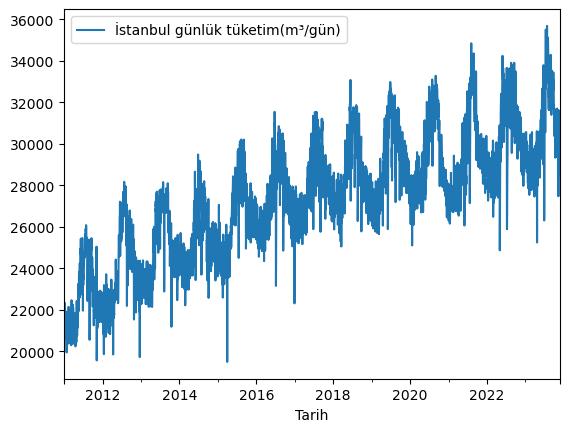

In [76]:
df.plot();

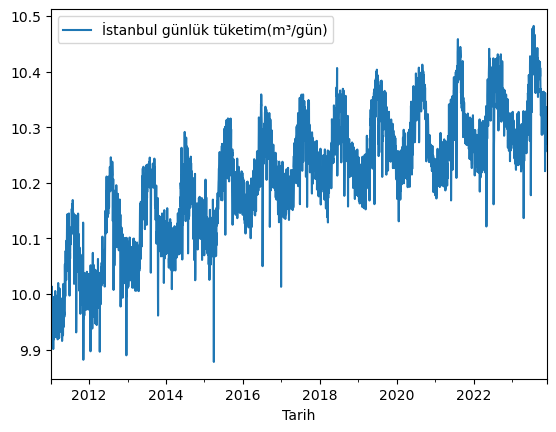

In [77]:
import numpy as np
df = np.log(df)

df.plot();

In [78]:
train=df.loc[df.index<"01-01-2021"]
test=df.loc[df.index>="01-01-2021"]

In [79]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [80]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

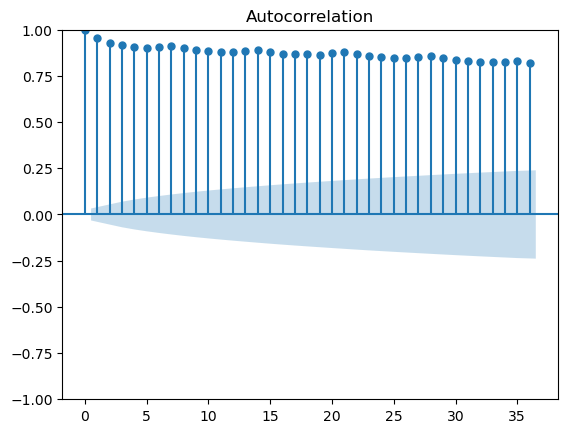

In [81]:
acf_original = plot_acf(train)

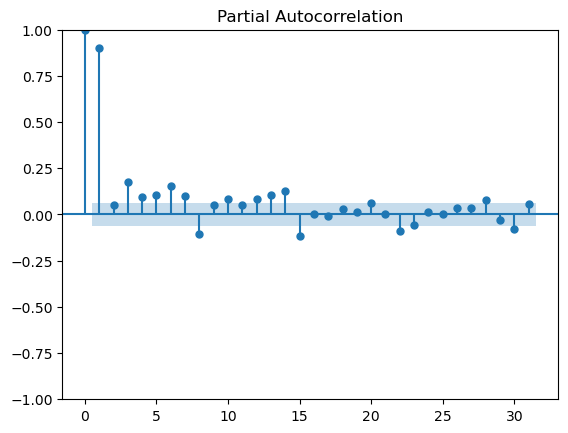

In [82]:
pacf_original = plot_pacf(test)

In [83]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(train)
print(f'p-value: {adf_test[0]}')

p-value: -2.7517622282265237


<Axes: xlabel='Tarih'>

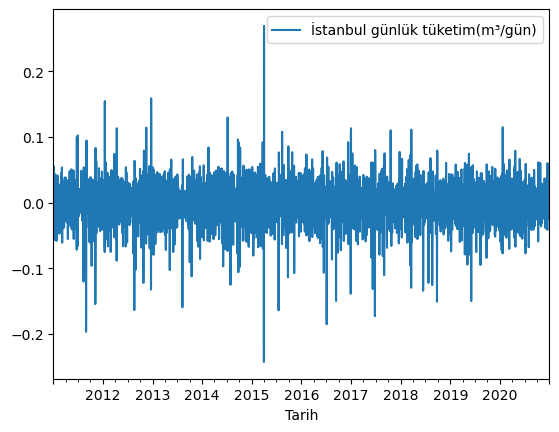

In [84]:
df_train_diff = train.diff().dropna()
df_train_diff.plot()

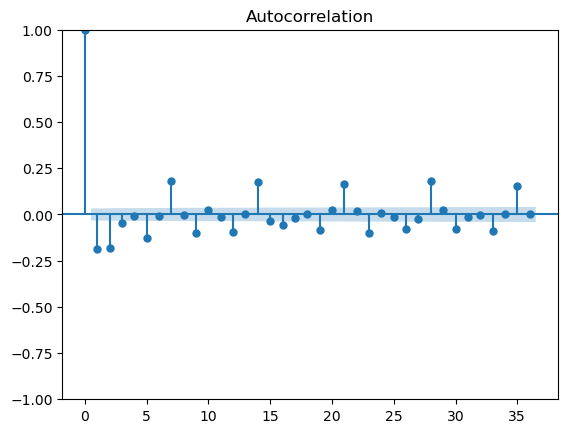

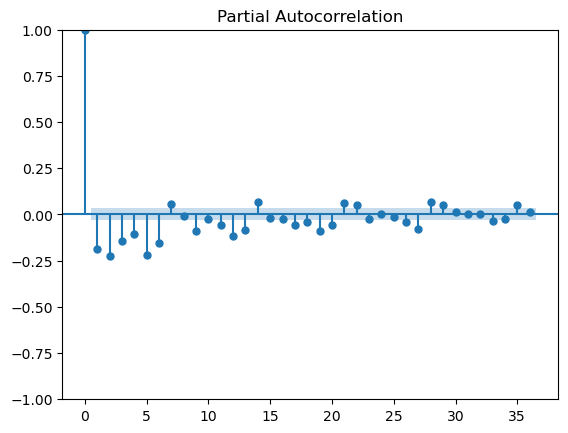

In [85]:
acf_diff = plot_acf(df_train_diff)

pacf_diff = plot_pacf(df_train_diff)

In [86]:
adf_test = adfuller(df_train_diff)
print(f'p-value: {adf_test[1]}')

p-value: 1.5668696322655323e-25


In [53]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(2,1,0))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\DOGUKAN\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DOGUKAN\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DOGUKAN\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:     İstanbul günlük tüketim(m³/gün)   No. Observations:                 3653
Model:                              ARIMA(2, 1, 0)   Log Likelihood                7620.964
Date:                             Tue, 12 Mar 2024   AIC                         -15235.928
Time:                                     23:30:54   BIC                         -15217.319
Sample:                                 01-01-2011   HQIC                        -15229.301
                                      - 12-31-2020                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2279      0.010    -21.968      0.000      -0.248      -0.208
ar.L2         -0.2235      

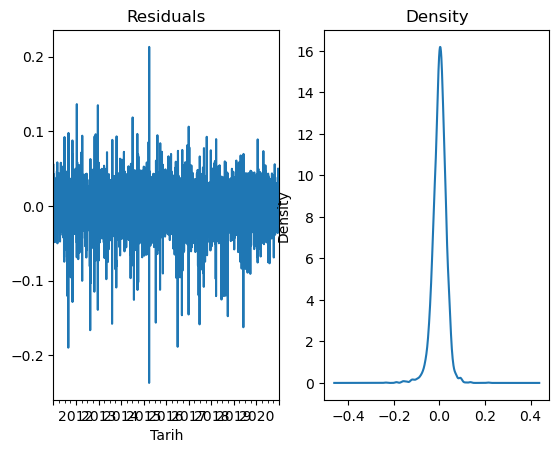

In [54]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

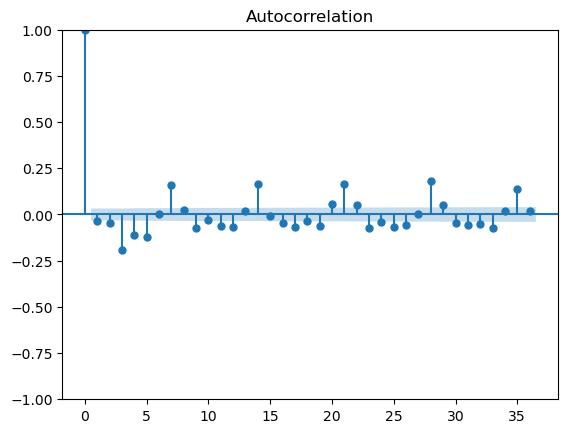

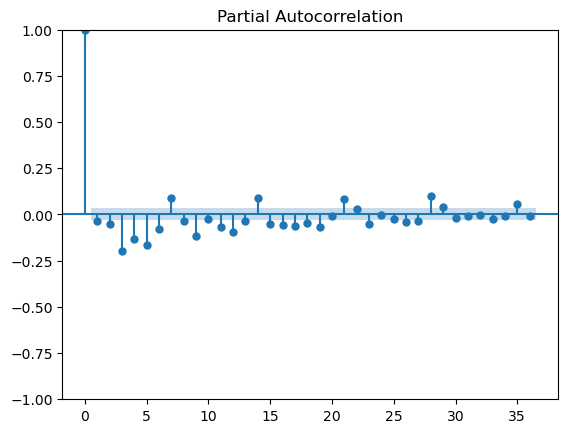

In [55]:
acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)

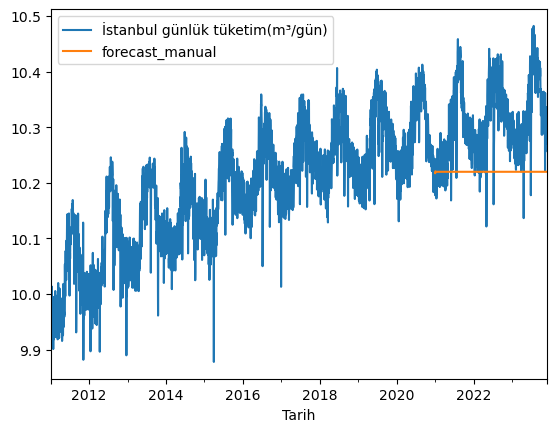

In [56]:
forecast_test = model_fit.forecast(len(test))

df['forecast_manual'] = [None]*len(train) + list(forecast_test)

df.plot();

In [59]:
forecast_test

2021-01-01    10.217527
2021-01-02    10.220488
2021-01-03    10.220230
2021-01-04    10.219627
2021-01-05    10.219822
                ...    
2023-11-23    10.219855
2023-11-24    10.219855
2023-11-25    10.219855
2023-11-26    10.219855
2023-11-27    10.219855
Freq: D, Name: predicted_mean, Length: 1061, dtype: float64

In [60]:
import pmdarima as pm
auto_arima = pm.auto_arima(train, stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(0, 1, 5), scoring_args={}, suppress_warnings=True)

In [61]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3653
Model:               SARIMAX(0, 1, 5)   Log Likelihood                7795.047
Date:                Tue, 12 Mar 2024   AIC                         -15576.094
Time:                        23:32:32   BIC                         -15532.672
Sample:                    01-01-2011   HQIC                        -15560.631
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.761e-05      0.000      0.568      0.570      -0.000       0.000
ma.L1         -0.3373      0.010    -33.111      0.000      -0.357      -0.317
ma.L2         -0.2501      0.016    -15.983      0.000      -0.281      -0.219
ma.L3         -0.0924      0.018     -5.027      0.000      -0.128      -0.056
ma.L4         -0.0223      0.019     -1.191      0.234      -0.059       0.014
ma.L5         -0.0712      0.018     -3.961      0.000      -0.106      -0.036
sigma2         0.0008    1.1e-05     74.332      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              5399.86
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                            -1.00
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

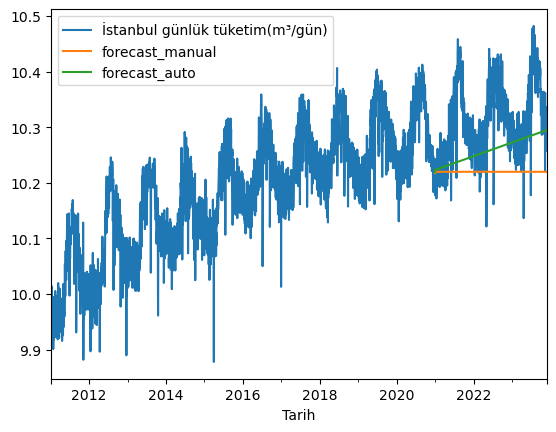

In [62]:
forecast_test_auto = auto_arima.predict(n_periods=len(test))
df['forecast_auto'] = [None]*len(train) + list(forecast_test_auto)

df.plot();

In [66]:
df

,İstanbul günlük tüketim(m³/gün),forecast_manual,forecast_auto
Tarih,,,
2011-01-01,9.950419,NaN,NaN
2011-01-02,10.005412,NaN,NaN
2011-01-03,9.948652,NaN,NaN
2011-01-04,9.950419,NaN,NaN
2011-01-05,10.005412,NaN,NaN
...,...,...,...
2023-11-23,10.309153,10.219855,10.294636
2023-11-24,10.302666,10.219855,10.294704
2023-11-25,10.315299,10.219855,10.294772


In [63]:
forecast_test_auto

2021-01-01    10.219473
2021-01-02    10.222155
2021-01-03    10.223479
2021-01-04    10.222755
2021-01-05    10.223514
                ...    
2023-11-23    10.294636
2023-11-24    10.294704
2023-11-25    10.294772
2023-11-26    10.294839
2023-11-27    10.294907
Freq: D, Length: 1061, dtype: float64

In [64]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(test, forecast_test)
mape = mean_absolute_percentage_error(test, forecast_test)
rmse = np.sqrt(mean_squared_error(test, forecast_test))

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')

mae - manual: 0.09278026144643933
mape - manual: 0.008961598222848782
rmse - manual: 0.11182713025667268


In [65]:
mae = mean_absolute_error(test, forecast_test_auto)
mape = mean_absolute_percentage_error(test, forecast_test_auto)
rmse = np.sqrt(mean_squared_error(test, forecast_test_auto))

print(f'mae - auto: {mae}')
print(f'mape - auto: {mape}')
print(f'rmse - auto: {rmse}')

mae - auto: 0.06055999231815268
mape - auto: 0.005846693875352894
rmse - auto: 0.07972772871891415
